In [4]:
from models.UNet import *
from keras_unet.models import custom_unet
import matplotlib.pyplot as plt
import numpy as np
import os
import time
from scipy.spatial import ConvexHull

# Load Data

In [ ]:
x_train = np.load('./dataset/x_train.npy')
y_train = np.load('./dataset/y_train.npy')
x_test = np.load('./dataset/x_test.npy')
y_test = np.load('./dataset/y_test.npy')

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


# Segmentation Class U-Net

In [3]:

seg_model = UNet(img_shape = x_train[0].shape, num_of_class = 1,learning_rate = 2e-4, do_drop = True, drop_rate = 0.5)

In [4]:
seg_model.show_model()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 64, 64, 1)]          0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 64, 64, 64)           640       ['input_1[0][0]']             
                                                                                                  
 conv2d_1 (Conv2D)           (None, 64, 64, 64)           36928     ['conv2d[0][0]']              
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 32, 32, 64)           0         ['conv2d_1[0][0]']            
 D)                                                                                           

Total params: 34512193 (131.65 MB)
Trainable params: 34512193 (131.65 MB)
Non-trainable params: 0 (0.00 Byte)
__________________________________________________________________________________________________
None


# Train Model

In [5]:
history = seg_model.train(x_train, y_train, epoch = 100, batch_size = 64)

Epoch 1/100



3/3 [==============================] - 6s 1s/step - loss: 1.5776 - dice_coef: 0.2007 - val_loss: 0.6028 - val_dice_coef: 0.2731
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 0.5998 - dice_coef: 0.2880 - val_loss: 0.5907 - val_dice_coef: 0.2665
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.5753 - dice_coef: 0.2956 - val_loss: 0.5788 - val_dice_coef: 0.2331
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.7446 - dice_coef: 0.3432 - val_loss: 0.6221 - val_dice_coef: 0.1860
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 0.6308 - dice_coef: 0.1959 - val_loss: 0.6255 - val_dice_coef: 0.1792
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 0.5910 - dice_coef: 0.2267 - val_loss: 0.5653 - val_dice_coef: 0.2430
Epoch 7/100
3/3 [==============================] - 3s 1s/step - loss: 0.5580 - dice_coef: 0.2702 - val_loss: 0.5514 - val_dice_coef: 0.2714
Epoch 8/100
3/3 [===============

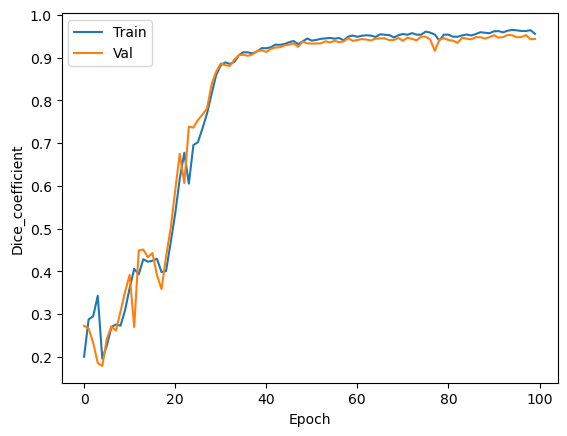

In [6]:
plot_dice(history)

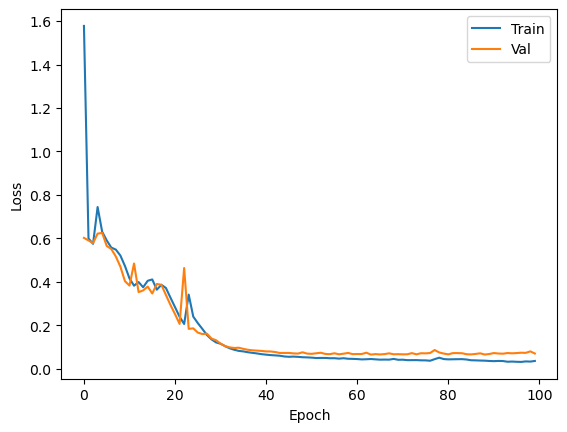

In [7]:
plot_loss(history)

# Show result

In [8]:
preds = seg_model.predict(x_test)

2/2 [==============================] - 1s 210ms/step


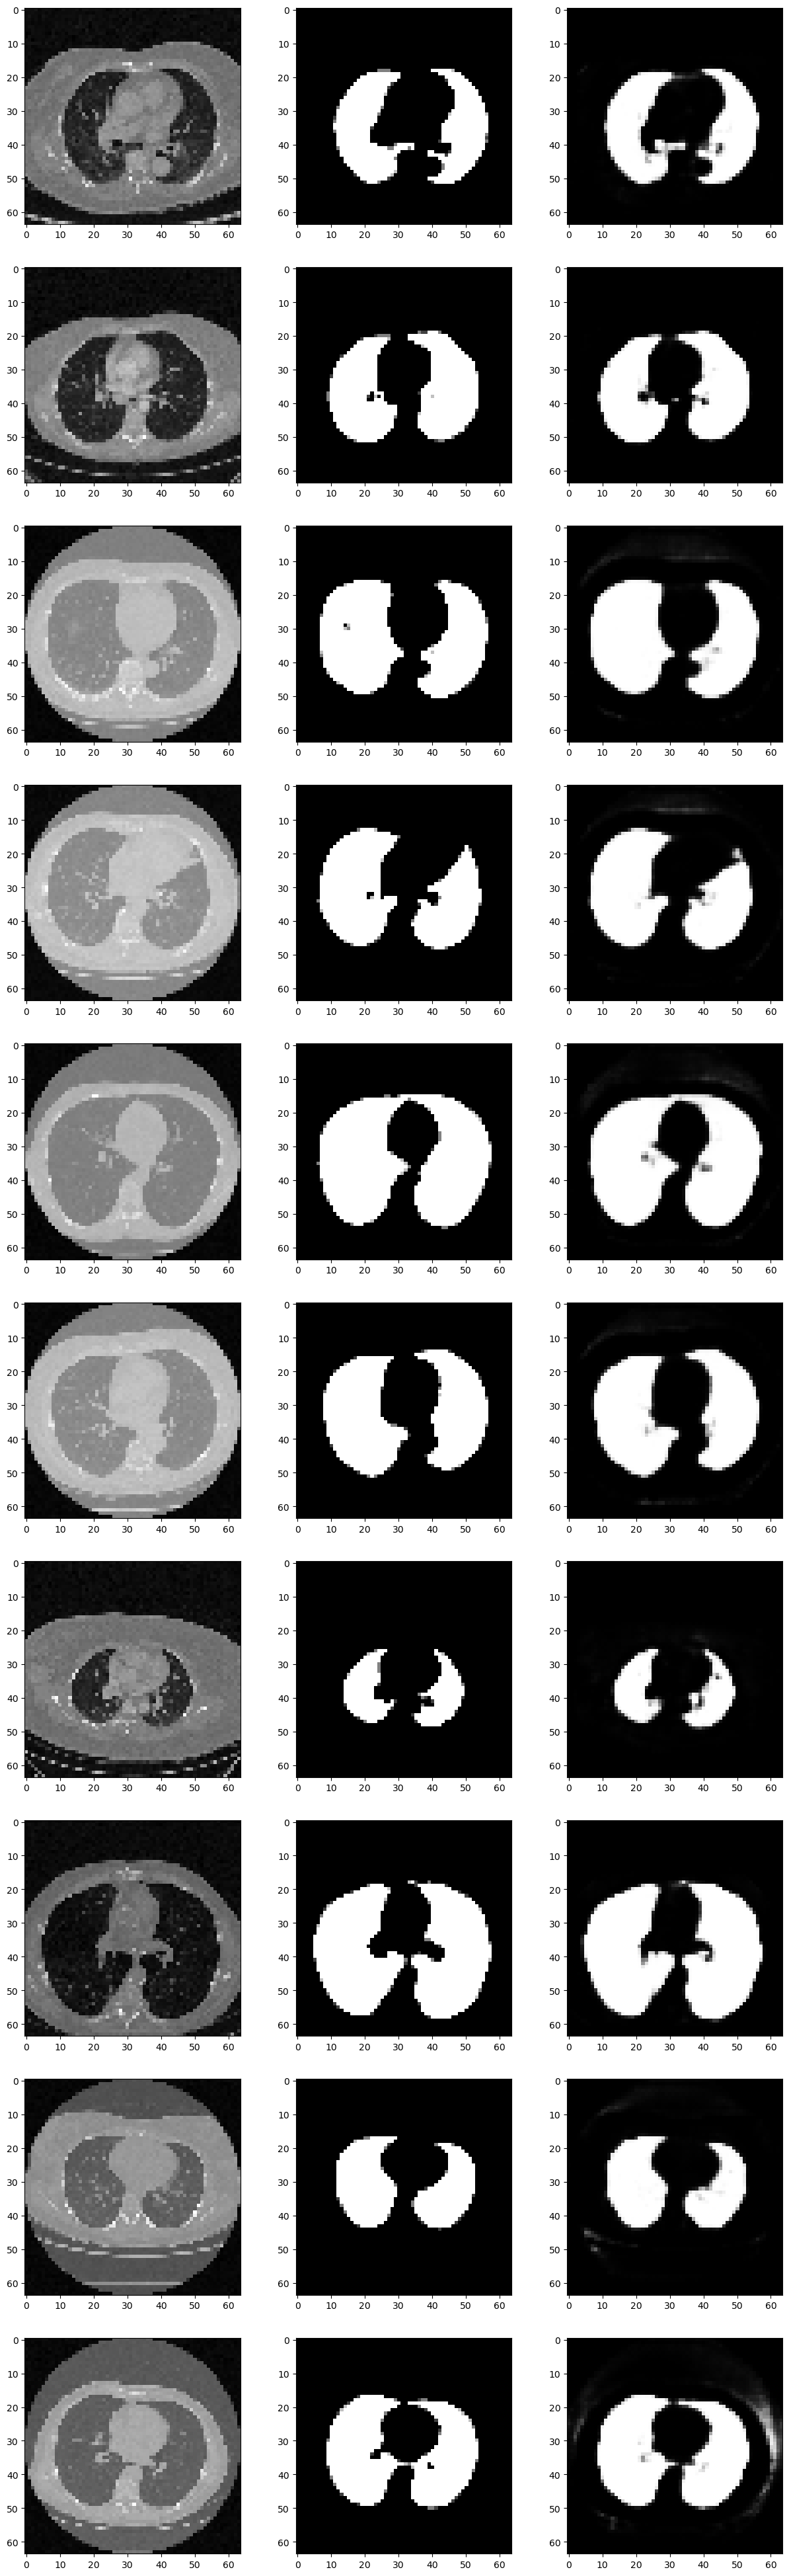

In [9]:
show_num = 10
fig, ax = plt.subplots(show_num, 3, figsize=(15, 50))

for i, pred in enumerate(preds[:show_num]):
    ax[i, 0].imshow(x_test[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_test[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')